In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

### Load Data

In [2]:
x = load_digits().data
y = load_digits().target
x = normalize(x, axis = 0)
ind = np.where(y == 4)[0]
y = (y == 4) * 1

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

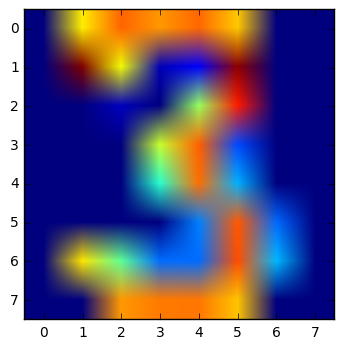

In [4]:
plt.imshow(X_train[0].reshape(8, 8))

In [18]:

def E(x, y, a, b):
    
    p = len(x[0])
    n = len(x)
    E = 0
    
    for i in range(n):
        ySombrero = a
        for j in range(p):
            ySombrero += b[j] * x[i,j]
        hold = y[i] - ySombrero
        E += math.pow(hold, 2)
        hold = 0
    
    return E
        
    
def grad_alpha(x, y, a, b):

    grad = 0
    p = len(x[0])
    n = len(x)
    sol = -2.0
    holdOut = 0
    
    for i in range(n):
        holdIn = a
        for j in range(p):
            holdIn += b[j] * x[i,j]
        holdOut += y[i] - holdIn
    sol *= holdOut
    
    return sol


def grad_beta(x, y, a, b, k):

    grad = 0
    p = len(x[0])
    n = len(x)
    sol = -2.0
    holdOut = 0
    
    for i in range(n):
        holdIn = a
        for j in range(p):
            holdIn += b[j] * x[i,j]
        holdOut += y[i] - holdIn
        holdOut *= x[i,k]
    sol *= holdOut
    
    return sol
        

def lin_reg(x, y):
    
    p = len(x[0])
    aOld = 0
    aNew = 0
    bOld = np.zeros(p)
    bNew = np.zeros(p)
    gamma = 0.0001
    max_iterations = 2000
    
    for i in range(max_iterations):
        Eold = E(x, y, aOld, bOld)
        aNew = aOld - (gamma * grad_alpha(x, y, aOld, bOld))
        
        for j in range(p):
            bNew[j] = bOld[j] - (gamma * grad_beta(x, y, aOld, bOld, j))
            
        Enew = E(x, y, aNew, bNew)
        
        if abs(Enew - Eold) < 1e-5:
            break
        if i % 10 == 0:
            print(i, ' ', Enew)
            
        aOld = aNew
        bOld = bNew
    
    return aNew, bNew
    
    

In [19]:
a,b = lin_reg(X_train, Y_train)

0   127.78506927999754
10   120.68300093010444
20   120.66965694439374


In [8]:
#y = a + np.dot(b, X_Test)
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0]
